# Time series smoothing in python | moving average and exponential smoothing in python

# Worked on 24 aug 2021

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams["figure.figsize"]=20,8

In [2]:
electrictimeseries=pd.read_csv("Electric_Production.csv", header=0, index_col=0)

In [3]:
electrictimeseries.shape

(397, 1)

In [4]:
electrictimeseries.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


# Moving Average Method

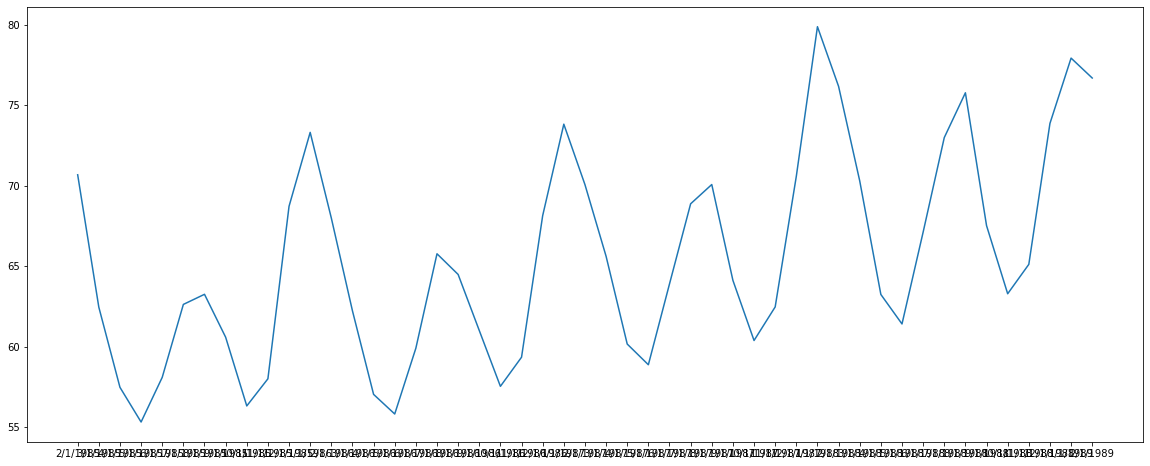

In [20]:
plt.plot(electrictimeseries[1:50]["IPG2211A2N"])

In [7]:
# Rolling series

rollingseries=electrictimeseries[1:50].rolling(window=5)

In [8]:
rollingmean=rollingseries.mean()

print(rollingmean.head(10))

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985     60.79982
7/1/1985     59.18946
8/1/1985     59.34912
9/1/1985     59.97176
10/1/1985    60.17182
11/1/1985    60.15384


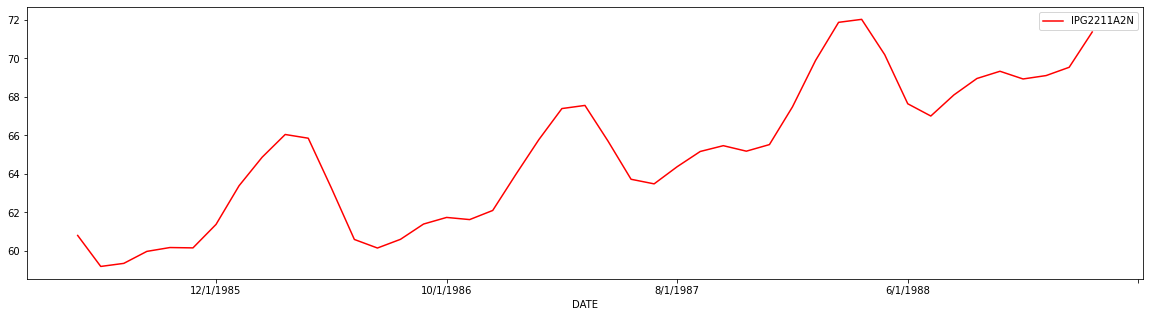

In [9]:
# Plot rolling mean

rollingmean.plot(color="red")
plt.show()

# Simple Exponential Smoothing

In [10]:
data=electrictimeseries[1:50]

fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


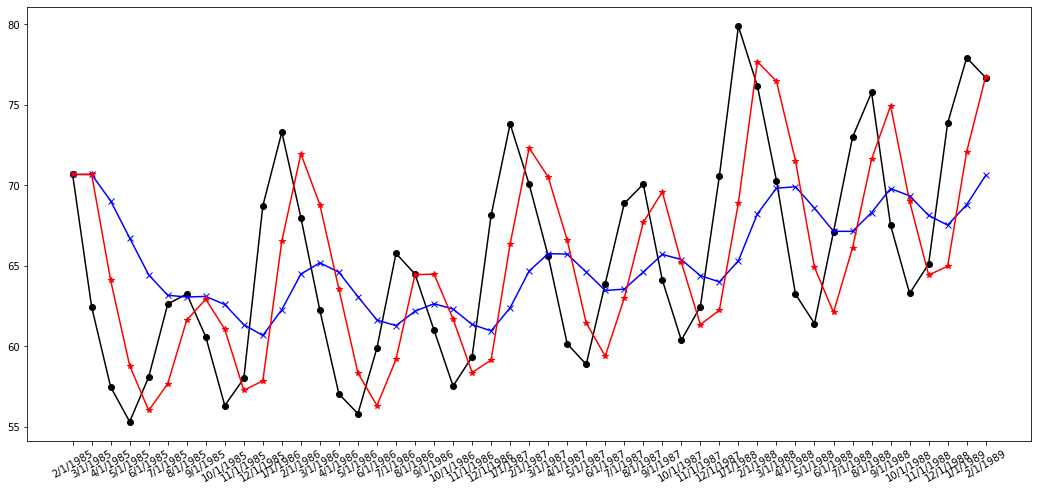

In [16]:
plt.figure(figsize=(18,8))

plt.plot(electrictimeseries[1:50], marker="o", color="black")
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker="x", color="Blue")

plt.plot(fit2.fittedvalues, marker="*", color="Red")

# holt method for exponential smoothing

In [17]:
fit1=Holt(data).fit() # linear trend

fit2=Holt(data, exponential=True).fit() # exp trend

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


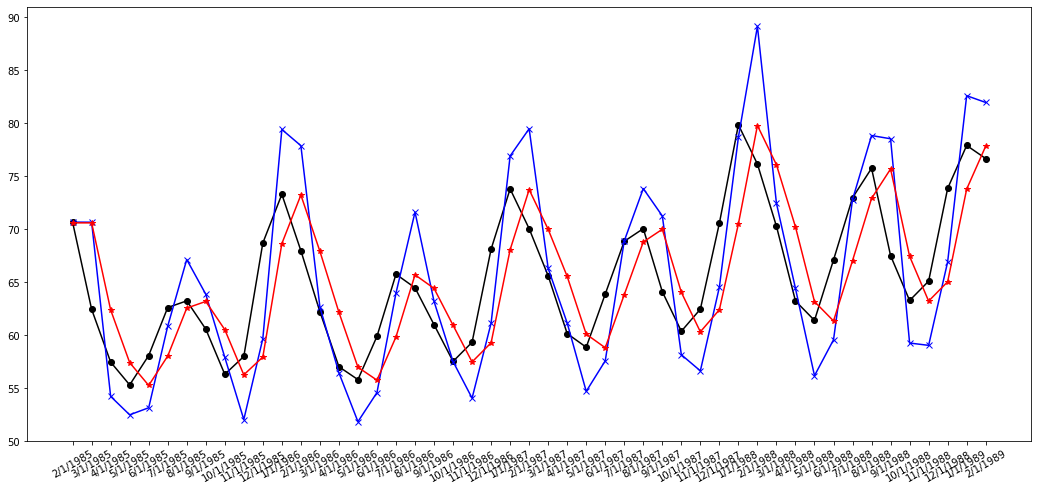

In [18]:
plt.figure(figsize=(18,8))

plt.plot(electrictimeseries[1:50], marker="o", color="black")
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker="x", color="Blue")

plt.plot(fit2.fittedvalues, marker="*", color="Red")